In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

## Feed forward Neural Network
input layer > weight > hidden layer 1 (activation function) > weights > hidden layer 2 (actiation function) ... > output layer  

compare output to intended output > cost/ lost Fuction

set Optimizer (ADAM, SGD, ADAGAD)

back propagation (adjusting weights to minimize loss)

Feed fordward + backpropagation = Epoch "cycle" in network

In [3]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
n_nodes_hl1 = 1000
n_nodes_hl2 = 500
n_nodes_hl3 = 500

In [5]:
# 10 classes, 0-9
n_classes = 10
batch_size = 128

In [6]:
# height x width
x = tf.placeholder(tf.float32, [None, 784]) # set input shape if you want to ensure all input data is correct size
y = tf.placeholder(tf.float32)

In [7]:
def neural_net_model(data):
    # (input data * weights) + biases
    hidden_1_layer = {'weights': tf.Variable(tf.random_normal([784, n_nodes_hl1])), # creates tensor of data using random values
                     'biases': tf.Variable(tf.random_normal([n_nodes_hl1]))} 
    
    hidden_2_layer = {'weights': tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])), # creates tensor of data using random values
                     'biases': tf.Variable(tf.random_normal([n_nodes_hl2]))}
    
    hidden_3_layer = {'weights': tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])), # creates tensor of data using random values
                     'biases': tf.Variable(tf.random_normal([n_nodes_hl3]))}
    
    output_layer = {'weights': tf.Variable(tf.random_normal([n_nodes_hl3, n_classes])), # creates tensor of data using random values
                     'biases': tf.Variable(tf.random_normal([n_classes]))}
    
    l1 = tf.add(tf.matmul(data, hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1) # apply activation func relu to hidden layer
    
    l2 = tf.add(tf.matmul(l1, hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2) # apply activation func relu to hidden layer
    
    l3 = tf.add(tf.matmul(l2, hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3) # apply activation func relu to hidden layer
    
    output = tf.add(tf.matmul(l3, output_layer['weights']), output_layer['biases'])
    
    return output
    

In [17]:
def train_neural_net(x):
    
    prediction = neural_net_model(x)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = prediction,labels= y)) # get diff of actual and residuals
    optimizer = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(cost) # learning rate = 0.001
    
    hm_epochs = 10
    
    with tf.Session() as sess:
        
        sess.run(tf.global_variables_initializer())
        loss_data = []
        for epoch in range(1, hm_epochs+1):
            epoch_loss = 0
            for _ in range(int(mnist.train.num_examples/batch_size)):
                epoch_x, epoch_y = mnist.train.next_batch(batch_size) # must build batch func manually
                _, c = sess.run([optimizer, cost], feed_dict= {x: epoch_x, y: epoch_y})
                epoch_loss += c
            print('Epoch {} completed out of {} loss: {}'.format(epoch, hm_epochs, epoch_loss))
            loss_data.append(epoch_loss)
            
        correct = tf.equal(tf.argmax(prediction,1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
        
        print('accuracy:', accuracy.eval(feed_dict= {x: mnist.test.images, y: mnist.test.labels}))
        return loss_data

In [18]:
train_neural_net(x)

Epoch 1 completed out of 10 loss: 1629029.7642822266
Epoch 2 completed out of 10 loss: 336210.00564575195
Epoch 3 completed out of 10 loss: 176947.09993743896
Epoch 4 completed out of 10 loss: 102903.77512404136
Epoch 5 completed out of 10 loss: 65794.79158782959
Epoch 6 completed out of 10 loss: 41026.43374824617
Epoch 7 completed out of 10 loss: 28112.420855099335
Epoch 8 completed out of 10 loss: 24558.326259613037
Epoch 9 completed out of 10 loss: 18641.814105421305
Epoch 10 completed out of 10 loss: 16161.378746124916
accuracy: 0.9557


[1629029.7642822266,
 336210.00564575195,
 176947.09993743896,
 102903.77512404136,
 65794.79158782959,
 41026.43374824617,
 28112.420855099335,
 24558.326259613037,
 18641.814105421305,
 16161.378746124916]

In [15]:
epoch_loss = [1506715.5659179688,
 355896.2795410156,
 187566.162399292,
 105774.6563796997,
 69082.02997779846,
 43102.94473471586,
 31470.78558906648,
 25525.16590499878,
 18876.89906354992,
 17356.031109261316]

In [11]:
import matplotlib.pyplot as plt
% matplotlib inline

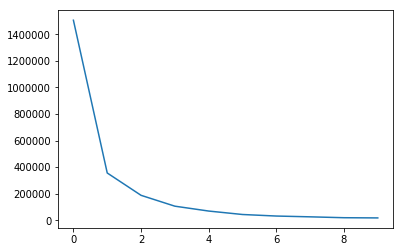

In [16]:
plt.plot(epoch_loss)
plt.show()